# Bayesian Spam Detection

Here, we'll take a look at spam detection using the bag-of-words model and the application of Bayesian detection.

The two hypotheses are H_0 (normal email) and H_1 (spam/phishing email).

The first step is to choose a dictionary. I've chosen this fairly arbitrarily from examples I found online. In a real-world system, you would need to estimate the probabilities for each word given the two hypotheses, but here I have made them up entirely.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

dictionary = ['order','report','mail','colleague','language','one','report','send','money','free']
p_0 = [10,5,15,10,5,20,20,10,5,1]
p_0 = p_0/np.sum(p_0)

p_1 = [7,5,20,15,10,15,13,20,15,10]
p_1 = p_1/np.sum(p_1)

#Note that p_0 and p_1 are NOT the likelihood functions!

Let's generate a "message" according to each hypothesis. Obviously this is not going to generate a realistic-looking message owing to the limited dictionary and the bag-of-words model.

In [5]:
N = 50

normal_message = np.random.choice(dictionary,size=N,p=p_0)
spam_message = np.random.choice(dictionary,size=N,p=p_1)

print(normal_message)
print(spam_message)

['one' 'report' 'one' 'one' 'order' 'money' 'one' 'colleague' 'report'
 'send' 'mail' 'report' 'report' 'mail' 'order' 'report' 'order' 'one'
 'report' 'report' 'order' 'money' 'report' 'mail' 'send' 'send' 'order'
 'one' 'money' 'one' 'report' 'send' 'one' 'colleague' 'report' 'one'
 'money' 'colleague' 'one' 'order' 'one' 'mail' 'one' 'report' 'colleague'
 'mail' 'one' 'report' 'send' 'report']
['one' 'one' 'send' 'colleague' 'send' 'colleague' 'language' 'order'
 'order' 'report' 'colleague' 'report' 'one' 'report' 'money' 'one' 'mail'
 'one' 'one' 'report' 'language' 'send' 'send' 'send' 'report' 'send'
 'language' 'one' 'colleague' 'money' 'colleague' 'colleague' 'colleague'
 'one' 'send' 'colleague' 'report' 'mail' 'one' 'report' 'language'
 'colleague' 'report' 'report' 'order' 'send' 'free' 'send' 'one'
 'language']


Now, let's build a Bayes classifier. To do so, we need to choose priors and cost functions, then we compute the LLR.

In [36]:
pi_0 = 0.9
pi_1 = 1-pi_0

C_00 = 1
C_11 = 1
C_10 = 2
C_01 = 6

Let's sample directly from the spam bag of words model using np.multinomial.

In [31]:
y = np.random.multinomial(N,p_1)
print(y)

[0 0 3 1 1 0 1 3 1 0]


Now, we compute the LLR and classify.

In [32]:
L = 0
for i in range(0,len(dictionary)):
    L += y[i]*np.log(p_1[i]/p_0[i])

threshold = np.log(((C_10-C_00)*pi_0)/((C_01-C_11)*pi_1))
print(L)
print(threshold)

2.18479008414
0.587786664902


Did we correctly detect the spam? Let's get a better sense of the detector performance by looking at the Bayes risk, averaged over many samples and for many priors.

C:\Users\fy4311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\fy4311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


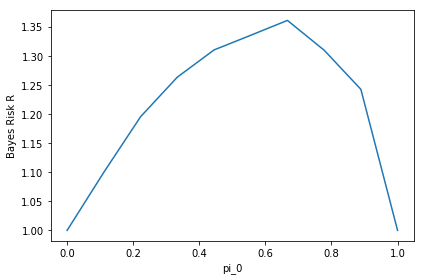

In [37]:
NUM_SAMPLES = 5000
N = 10
pi_0s = np.linspace(0,1,10)

R = np.zeros(pi_0s.size)

for i in range(0,pi_0s.size):
    this_pi0 = pi_0s[i]
    this_pi1 = 1- this_pi0
    threshold = np.log(((C_10-C_00)*this_pi0)/((C_01-C_11)*this_pi1))

    for k in range(0,NUM_SAMPLES):
        #draw a sample from H, and then from p(y|H)
        H = np.random.choice(2,p=[this_pi0,this_pi1])
        if(H==0):
            y = np.random.multinomial(N,p_0)
            L = 0
            for j in range(0,len(dictionary)):
                L += y[j]*np.log(p_1[j]/p_0[j])
            if(L<threshold):
                R[i] += C_00/NUM_SAMPLES
            else:
                R[i] += C_10/NUM_SAMPLES
        else:
            y = np.random.multinomial(N,p_1)
            L = 0
            for j in range(0,len(dictionary)):
                L += y[j]*np.log(p_1[j]/p_0[j])
            if(L<threshold):
                R[i] += C_01/NUM_SAMPLES
            else:
                R[i] += C_11/NUM_SAMPLES  

plt.plot(pi_0s,R)

plt.xlabel("pi_0")
plt.ylabel("Bayes Risk R")

plt.tight_layout()
plt.show()

It's worth fiddling both with the costs and the number of words N per sample. How do the affect the Bayes risk? Which prior is the worst-case prior, corresponding with the minimax detector? How does changing the costs impact this prior?